<a href="https://colab.research.google.com/github/NextGen-AI-Camp/curriculum/blob/main/Week%233/NN%232/NextGen_AI_Camp_Neural_Network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network Node

ในตอนที่ 1 เราได้ทำความรู้จักกับ Perceptron และได้นำแนวคิดของ Perceptron มาทำนายค่าของสมการเชิงเส้น ซึ่ง Perceptron นี้ ต่อมาก็ได้เป็นที่รู้จักในชื่อของ Neural Network หรือ โครงข่ายประสาทเทียม โดย Perceptron จะเป็น 1 Node ใน Nueral Network ซึ่ง Nueron จะแสดงด้วยภาพดังนี้

<div>
<br>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*upfpVueoUuKPkyX3PR3KBg.png" width="800"/>
<br>
</div>

จะเห็นได้ว่า Nueron หรือ Perceptron ก็เป็นเพียงตัวประมวลผล ที่จะนำแต่ละ Input มาคูณกับค่า weight แล้วนำมาบวกรวมกันเท่านั้น ซึ่ง Input จะมีกี่ตัวก็ได้

โดยในตอนที่ 1 แต่ละ Input จะมีเพียง 1 ค่า ดังนั้นสมการก็จะมีเพียง

$$ y = wx $$




### ความสำคัญของ bias

อาจจะสงสัยว่าแล้ว b คืออะไร มาจากไหน ทำไมต้องมี และ มีความสำคัญอย่างไร b ย่อมาจาก Bias ซึ่งเป็นค่าที่เติมเข้ามาเพื่อให้ Perceptron ทำงานได้มากขึ้น เพื่อให้เข้าใจ ลองพิจารณากราฟต่อไปนี้


<div>
<br>
<img src="https://wikidocs.net/images/page/181776/Fig_04_0.png" width="400"/>
<br>
</div>

สมมติว่ามีการปรับค่า weight จาก 1.00 เป็น 2.00


<div>
<br>
<img src="https://wikidocs.net/images/page/181776/Fig_05.png" width="400"/>
<br>
</div>

หรือปรับค่า weight เป็น -0.7


<div>
<br>
<img src="https://wikidocs.net/images/page/181776/Fig_06.png" width="400"/>
<br>
</div>

จะเห็นได้ว่าไม่ว่าค่า weight จะเป็นเท่าไร กราฟจะตัดแกน y ที่ 0 เสมอ ทำให้ไม่สามารถจะเป็นตัวแทนของข้อมูล Linear ใดๆ ได้

แต่หากเราเพิ่ม bias เข้าไป ตามตัวอย่าง

<div>
<br>
<img src="https://wikidocs.net/images/page/181776/Fig_07.png" width="400"/>
<br>
</div>

จะเห็นว่าจุดตัดแกน y จะเปลี่ยนไป และอาจกล่าวได้ว่า weight ทำหน้าที่กำหนดความชันของเส้นกราฟ แต่ bias ทำหน้าที่กำหนดจุดตัดแกน y

ใน Neural Network ค่าของ bias มีความสำคัญมาก ซึ่งจะแสดงให้เห็นต่อไป ดังนั้นสมการที่แทน Perceptron 1 ตัวแปร จึงเป็น

$$ y = wx + b $$

และ สมการที่แทน Perceptron n ตัวแปร จึงเป็น

$$ y = w_1x_1 +  w_2x_2 + w_3x_3 ... + w_nx_n +b $$


## การทำงานกับข้อมูลไม่เชิงเส้น

ในตอนที่ 1 เราใช้สมการเชิงเส้นอย่างง่าย เพื่ออธิบายการทำงานของ Perceptron แต่ถ้าเป็นสมการไม่เชิงเส้นบ้างละ จะแก้ปัญหาอย่างไร






### สร้างข้อมูล

เราจะทำเหมือนเดิม คือ สร้างข้อมูลก่อน โดยใช้โปรแกรมด้านล่างนี้

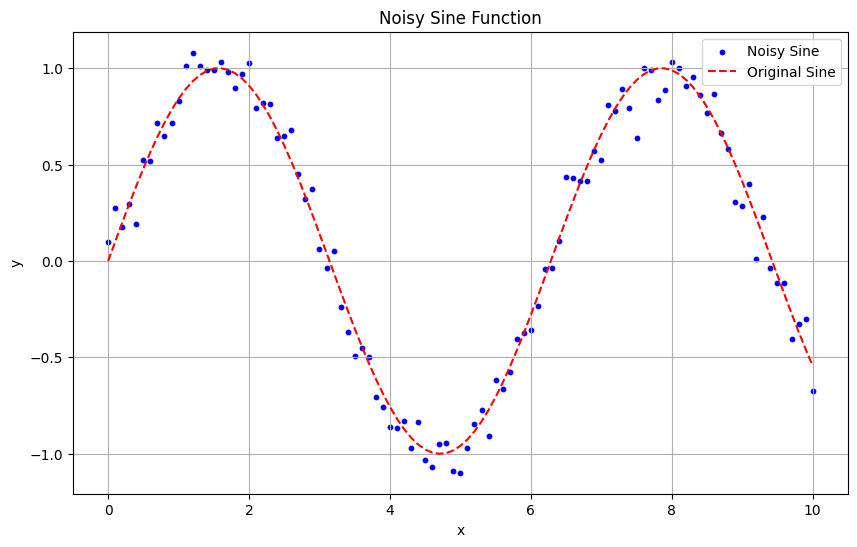

First few points in the dataset:
(0.0, 0.09848350718176935)
(0.1, 0.272336493352578)
(0.2, 0.17395639301566881)
(0.30000000000000004, 0.2941866259386816)
(0.4, 0.19063448430718605)
(0.5, 0.525305844148873)
(0.6000000000000001, 0.5160544479325465)
(0.7000000000000001, 0.7166734341881358)
(0.8, 0.6505071217588284)
(0.9, 0.7160353868177617)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_points(start=0, end=10, step=0.1):

    # Generate x values from start to end with the given step size
    x_values = np.arange(start, end + step, step)
    num_points = len(x_values)

    # Generate y values as sine of x values
    y_values = np.sin(x_values)

    # Add noise to the y values
    noise = np.random.randn(num_points) * 0.1
    noisy_y_values = y_values + noise

    # Combine x and noisy y values into a list of points
    points = list(zip(x_values, noisy_y_values))

    return points

def plot_points(points):

    # Extract x and y values from points
    x_values, noisy_y_values = zip(*points)
    x_values = np.array(x_values)
    noisy_y_values = np.array(noisy_y_values)

    # Generate y values as sine of x values for comparison
    y_values = np.sin(x_values)

    # Plot the noisy sine function as a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, noisy_y_values, label='Noisy Sine', color='blue', s=10)
    plt.plot(x_values, y_values, label='Original Sine', color='red', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Noisy Sine Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate the dataset
Points = generate_points()

# Plot the dataset
plot_points(Points)

# Print the first few points to verify
print("First few points in the dataset:")
for point in Points[:10]:
    print(point)

จะเห็นได้ว่าข้อมูลข้างต้นจะเป็นข้อมูลที่สร้างมาจากสมการรูป sine โดยเพิ่ม noise เข้าไป และเป้าหมาย คือ สร้าง Neural Network ที่สามารถทำนายค่า y จาก x ที่ให้ โดยหวังว่าจะมีค่าอยู่ใกล้เคียงเส้นที่เป็นรูป sine

ในส่วนท้ายของโปรแกรม เราได้สั่งให้ print ข้อมูล 10 ตัวแรกออกมาด้วย

### Neural Network

ที่ผ่านมาเราได้กล่าวถึง Perceptron ซึ่งหมายถึงเซลล์ประสาทเทียมเพียง 1 หน่วย คราวนี้เราจะลองเอามาเชื่อมต่อกันเป็นเครือข่าย เนื่องจาก Perceptron เพียง 1 หน่วย คงจะไม่สามารถประมาณค่า sine ได้ ซึ่งเมื่อนำมาต่อเป็นเครือข่ายจะมีชื่อเรียกว่า Artificial Neural Network (ANN) หรือ Multi Layer Perceptron (MLP) โดย Neural Network จะประกอบด้วยชั้นต่างๆ ก่อนอื่นต้องรู้จักชื่อเรียกของโครงสร้างของ Neural Network กันก่อน

เช่น สมมติว่า เรามี Neural Networks หน้าตาแบบนี้
- ส่วนแรก (สีเหลือง) จะเรียกว่า Input Layer ทำหน้าที่แทน Input แต่ละตัว ส่วนของ Input Layer จะทำหน้าที่เพียงป้อนข้อมูลเข้ามาใน Network เท่านั้น ส่วนของ Input Layer จะมีเพียงชั้นเดียวเท่านั้น
- ส่วนถัดมา (สีฟ้า)ซึ่งถือเป็นส่วนสำคัญที่สุดของ Neural Network คือ Hidden Layer ซึ่งเป็นส่วนของ Perceptron หรือ Neuron แต่ละตัว ซึ่งใน Hidden Layer นี้อาจมีชั้นเดียว หรือ อาจจะเป็นร้อยๆ ชัันก็ได้ (ถ้ามากกว่า 2 ชั้น มักจะเรียกว่า Deep Learning)
- ส่วนสุดท้าย คือ ส่วนที่ทำหน้าที่ให้คำตอบ เรียกว่า Output Layer จะมีเพียงชั้นเดียวเช่นกัน

<div>
<br>
<img src="https://i0.wp.com/datarockie.com/wp-content/uploads/2022/06/artificial-neural-network-one-hidden-layer.jpg?resize=827%2C609&ssl=1" width="300"/>
<br>
</div>






### เจาะลึก Perceptron

เราได้กล่าวว่า Perceptron เป็นหน่วยเล็กที่สุดของ Neural Network ซึ่งเป็นความจริง อาจเปรียบได้กับ อะตอม ซึ่งเป็นหน่วยที่เล็กที่สุดของสสาร แต่ภายใน Perceptron ก็ยังมีการทำงานย่อยลงไปอีก ซึ่งควรจะทำความเข้าใจเอาไว้เช่นกัน เมื่อมองการทำงานของ Perceptron อาจมองว่ามีส่วนประกอบด้วยกัน 3 ส่วน เช่น สมมติว่ามี Perceptron ที่ประกอบด้วย 3 Input, 1 Output และ 1 Activation Function สามารถเขียนเป็นรูปได้ดังนี้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN3.JPG?raw=true" width="400"/>
<br>
</div>

จะเห็นได้ว่าใน Perceptron นี้จะประกอบด้วยหน่วยย่อยที่ทำหน้าที่ "คูณ" จำนวน 3 หน่วย จากนั้นผลลัพธ์จากการคูณ ก็จะส่งต่อมาที่หน่วยย่อยที่ทำหน้าที่ "บวก" ข้อมูลจาก 3 หน่วยเข้าด้วยกัน และ บวกกับค่า Bias จากนั้นผลลัพธ์จากการบวก ก็จะนำไปสู่ส่วนของ Activation Function ซึ่งจะกล่าวถึงต่อไป

การมองภาพของ Neuron หรือ Perceptron ในระดับละเอียดแบบนี้จะมีความสำคัญต่อไป เนื่องจากในการเขียนโปรแกรม เราจะต้องสร้างองค์ประกอบที่เทียบเท่าการทำงานในรูปขึ้นมา


### คลาส Neuron

เอาละ เมื่อเราทำความเข้าใจกับส่วนประกอบย่อยที่สุดของ Neuron หรือ Perceptron แล้วเราจะมาเขียนโปรแกรมในส่วนของ Neuron กัน ซึ่งเราจะใช้เทคนิคที่เรียกว่า Object Oriented Programming หรือ OOP มาช่วย เพื่อให้โปรแกรมที่มีโครงสร้างเป็นหมวดหมู่

โปรแกรมส่วนของ Neuron จะมีดังนี้

In [ ]:
import numpy as np
class Neuron:
    def __init__(self, input_dim, activation=None):
        self.W = np.random.randn(input_dim)   # array of weight
        self.b = np.random.randn()            # bias
        self.activation = activation

    def forward(self, X):
        self.X = X                            # array of input
        self.Z = np.dot(X, self.W) + self.b   # dot product of WX+b
        if self.activation:
            self.A = self.activation.forward(self.Z)
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        if self.activation:
            dZ = self.activation.backward(self.Z, dA)
        else:
            dZ = dA
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ)
        dX = np.dot(dZ, self.W)
        return dW, db, dX

nn = Neuron(4)
print(nn.W)
print(nn.b)


[-0.4494715  -1.18883344 -1.58645465  0.44631631]
0.21891739734917526


ในคลาส Neuron จะประกอบด้วย
- ฟังก์ชัน ```__init__``` เป็นฟังก์ชันที่ทำหน้าที่เริ่มต้นการทำงาน โดยฟังก์ชันนี้จะถูกเรียกใช้โดยอัตโนมัติ เมื่อมีการกำหนด class Neuron จะประกอบด้วยการกำหนดค่าเริ่มต้นของ weights และ bias ซึ่งมักจะใช้การสุ่มตัวเลขขึ้นมาเป็น weights และ bias จะสังเกตุได้ว่า จำนวน weight จะมีจำนวนตามจำนวน Input
- ฟังก์ชัน forward เป็นฟังก์ชันที่ถูกเรียกใช้ในขณะที่ทำ forward pass คือ คำนวณค่า output ของ node ในโปรแกรมนี้จะใช้ฟังก์ชัน dot product ของ NumPy ซึ่งจะเป็นการนำเอาเวกเตอร์ weights ซึ่งหากมี 3 Input ก็จะเป็น [w1, w2, w3] มาคูณกับเวกเตอร์ x ซึ่งหากมี 3 Input ก็จะเป็น [x1, x2, x3] ซึ่งจะเท่ากับ $w_1x_1 + w_2x_2 + w_3x_3$ และเมื่อนำมาบวกกับ bias ก็จะเท่ากับ $w_1x_1 + w_2x_2 + w_3x_3 + b$ นั่นเอง จากนั้นก็นำผลลัพธ์ที่ได้มาผ่าน Activation Function อีกครั้ง จึงจะได้เป็น output



- ฟังก์ชัน backward จะถูกเรียกใช้ในขณะที่ทำ backward passs ซึ่งคือการทำงานย้อนกลับเพื่อปรับค่า weight และ bias ซึ่งจะอธิบายในภายหลัง เนื่องจากจะต้องอธิบายทฤษฎีที่อยู่เบื้องหลัง


### แสดงการทำงาน Forward Pass

เพื่อให้เห็นการทำงานของโปรแกรมที่ชัดเจนขึ้น จะขอยกตัวอย่าง โดยสมมติว่า โครงสร้างของ Neural Network มีดังนี้

<img src="https://github.com/khthana/AI_resource/blob/main/NN7.JPG?raw=true" width="400">

สมมติข้อมูลต่อไปนี้
- In มีค่าเท่ากับ $[0.5​]$
- ค่า weight ของโหนด 1, 2, 3, 4 เท่ากับ $[0.1],[-​0.2],[​0.3],[​0.4​]$ ตามลำดับ
- ค่า weight ของโหนด 5 เท่ากับ $[0.1, 0.3, 0.5, 0.7]$
- ค่า weight ของโหนด 6 เท่ากับ $[-0.1, -0.3, -0.5, -0.7]$
- ค่า weight ของโหนด 7 เท่ากับ $[0.2, 0.4, 0.6, 0.8]$
- ค่า weight ของโหนด 8 เท่ากับ $[-0.2 , -0.4 , -0.6 , -0.8]$
- ค่า bias ของโหนด 1, 2, 3, 4 เป็น 0.01, 0.02, 0.03, 0.04 ตามลำดับ

สมมติว่า output ของ node 1 - 4 เท่ากับ 0.06, -0.08, 0.18, 0.24

ดังนั้นในการทำงานของ Node 5 ในบรรทัด `np.dot(X, self.W) + self.b `จะเท่ากับ


\begin{bmatrix}
0.06 & -0.08 & 0.18 & 0.24
\end{bmatrix}

$$*$$
\begin{bmatrix}
0.1 \\
0.3 \\
0.5 \\
0.7
\end{bmatrix}

$=
0.06 \times 0.1 - 0.08 \times 0.3 + 0.18 \times 0.5 + 0.24 \times 0.7$

$ = 0.006 - 0.024 + 0.09 + 0.168 $

$ = 0.24 + bias = 0.24 + 0.1 = 0.34 $


### โครงสร้าง Neural Network ที่จะใช้

โครงสร้าง Neural Network ที่จะใช้ ประกอบด้วย Input Layer 1 Neuron, Hidden Layer 16+20 Neuron และ Output Layer 1 Neuron จะได้ Neural Network ตามรูป แต่หากจะถามว่าทำไมต้องเป็น 16+20 ตรงนี้จะไม่มีคำตอบที่แน่นอน เพราะจะใช้มากหรือน้อย มักจะใช้การทดลองว่าจะสร้างโครงสร้างที่ซับซ้อนน้อยที่สุดแค่ไหน ถึงจะทำทำนายค่าที่ใกล้เคียงเท่าที่ต้องการได้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN4.JPG?raw=true" width="600"/>
<br>
</div>




### Layer of Neuron

เนื่องจากโครงสร้างที่เราจะใช้จะมี Neuron จำนวนมาก ในแต่ละ Layers ซึ่งแต่ละ Neuron จะมีการทำงานที่เหมือนกัน คือ การคูณ และ บวก ดังนั้นเพื่อให้โปรแกรมทำงานได้เร็วขึ้น และเขียนโปรแกรมได้สั้นลง เราจะเขียน class Neuron ใหม่ โดยจับข้อมูลของทุก Neuron มาเรียงในรูปแบบ Matrix และใช้การคูณแบบ Matrix ซึ่งจะทำให้สามารถคูณได้พร้อมๆ กันทุก Neuron ไปพร้อมๆ กัน ซึ่งเขียนเป็น class Neuron ใหม่ดังนี้ (ขอใช้ชื่อเดิม แต่อันที่จริงจะหมายถึง Neuron ทุก Neuron ที่อยู่ใน Layer เดียวกัน)

In [ ]:
class Neuron:
    def __init__(self, input_dim, output_dim, activation=None):
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.random.randn(1, output_dim)
        self.activation = activation

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.b
        if self.activation:
            self.A = self.activation.forward(self.Z)
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        if self.activation:
            dZ = self.activation.backward(self.Z, dA)
        else:
            dZ = dA
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        return dW, db, dX

### แสดงการทำงานของ Forward Pass แบบ Layer

เพื่อให้เข้าใจได้ชัดเจนถึงการทำงานของทุก Node ใน Layer เดียวกันใน dot product ครั้งเดียว จะขอยกตัวอย่าง โดยใช้ตัวอย่างของ Neural Network ก่อนหน้า

ค่าที่สมมติ
- Input $X = [0.5]$

- Weight $W_2 (Layer2) = \begin{bmatrix}0.1 & -0.2 & 0.3 & 0.4\end{bmatrix}$

- Bias $b_2 (Layer2) = \begin{bmatrix}0.01 & 0.02 & 0.03 & 0.04\end{bmatrix}$

- Weight $W_3 (Layer3) = \begin{bmatrix}
0.1 & -0.1 & 0.2 & -0.2 \\
0.3 & -0.3 & 0.4 & -0.4 \\
0.5 & -0.5 & 0.6 & -0.6 \\
0.7 & -0.7 & 0.8 & -0.8
\end{bmatrix}$

- Bias $b_3 (Layer3) = \begin{bmatrix}0.1 & 0.1 & 0.1 & 0.1\end{bmatrix}$
<br>

**คำนวณ Z สำหรับ Layer 2**
$$ Z_2 = X . W_2 + b_2$$

$ Z_2 = [0.5].\begin{bmatrix}0.1 &-0.2 & 0.3 & 0.4\end{bmatrix} + \begin{bmatrix}0.01 &0.02 & 0.03 & 0.04\end{bmatrix}$

$Z2​=\begin{bmatrix}0.5×0.1&​0.5×−0.2​&0.5×0.3&​0.5×0.4​\end{bmatrix}+\begin{bmatrix}0.01&​0.02​&0.03&​0.04​\end{bmatrix}$

$Z2​=\begin{bmatrix}0.05&​−0.1&​0.15&​0.2​\end{bmatrix}+\begin{bmatrix}0.01​&0.02&​0.03&​0.04\end{bmatrix}$

$Z2​=\begin{bmatrix}0.06&​−0.08&​0.18&​0.24\end{bmatrix}$

**คำนวณ Z สำหรับ Layer 3**
$$ Z_3 = A_2 . W_3 + b_3$$

$ Z_3 = \begin{bmatrix}0.06&​−0.08&​0.18&​0.24\end{bmatrix} . \begin{bmatrix}
0.1 & -0.1 & 0.2 & -0.2 \\
0.3 & -0.3 & 0.4 & -0.4 \\
0.5 & -0.5 & 0.6 & -0.6 \\
0.7 & -0.7 & 0.8 & -0.8
\end{bmatrix}$ + \begin{bmatrix}0.1 & 0.1 & 0.1 & 0.1\end{bmatrix}

Z3 = [0.06x0.1 + 0x0.3 + 0.18x0.5 + 0.24x0.7
&nbsp;&nbsp;0.06x-0.1 + 0x-0.3 + 0.18x-0.5 + 0.24x-0.7&nbsp;&nbsp;0.06x0.2 + 0x0.4 + 0.18x0.6 + 0.24x0.8&nbsp;&nbsp;0.06x-0.2+0x-0.4+0.18x-0.6+0.24x-0.8] + [0.1&nbsp;&nbsp;0.1&nbsp;&nbsp;0.1&nbsp;&nbsp;0.1]

Z3=[0.006+0.09+0.168&nbsp;&nbsp;​−0.006−0.09−0.168​&nbsp;&nbsp;0.012+0.108+0.192&nbsp;&nbsp;​−0.012−0.108−0.192] + [0.1​&nbsp;&nbsp;0.1​&nbsp;&nbsp;0.1&nbsp;&nbsp;0.1]

Z3 = [0.264&nbsp;&nbsp;-0.264&nbsp;&nbsp;0.312&nbsp;&nbsp;-0.312] + [0.1&nbsp;&nbsp;0.1&nbsp;&nbsp;0.1&nbsp;&nbsp;0.1]

Z3 = [0.364&nbsp;&nbsp;−0.164&nbsp;&nbsp;​0.412&nbsp;&nbsp;​−0.212]




### Training Loop

การทำงานของ Neural Network จะมีวงจรตามรูป โดยจะมี Input ซึ่งจะนำไปคูณกับ weight + bias ตามสมการข้างต้น จากนั้น Architecture หรือ Model จะทำหน้าที่รวมข้อมูลของ Input x weight + bias และนำมาประมวลผลเป็นผลลัพธ์ (เรียกว่าการทำนายหรือ prediction) จากนั้นจะวัดประสิทธิภาพ โดยวัดจากค่า Loss เทียบกับผลลัพธ์จริง (อาจเรียกว่า Target หรือ Label) ตามที่ได้อธิบายไปในตอนที่ 1 จากนั้นจึงนำค่า Loss มาใช้ในการปรับ weight ซึ่งหากการทำงานเป็นไปด้วยดี ในวงรอบถัดไปค่า Loss ควรจะลดลงเรื่อยๆ จนถึงจุดต่ำสุดที่ Model จะทำได้ จึงจะหยุดทำงาน

<div>
<br>
<img src="https://www.oreilly.com/api/v2/epubs/9781492045519/files/assets/dlcf_0108.png" width="600"/>
<br>
</div>

การทำงานของ Neural Network จะเป็นไปตามรูปด้านบนเสมอ ไม่ว่า Model จะใหญ่มากแค่ไหน หรือมี Input เป็นอะไร มีจำนวน Input มากมายเพียงใด อาจสรุปได้ว่าสิ่งที่เราต้องการให้ Model ทำ คือ การหาค่า weight ที่เหมาะสมที่สุดที่จะให้คำตอบนั่นเอง

และ สำหรับ Multi Layer Nueral Network หรือ Multi Layer Perceptron ก็เพียงแต่เพิ่มจำนวน Perceptron หรือ Neuron เข้าไปเท่านั้น แต่การทำงานก็ยังเหมือนเดิม

การทำงานใน Nueral Network จะแบ่งออกเป็น 2 ส่วน เรียกว่า Forward pass ซึ่งครอบคลุมตั้งแต่การรับ Input จนถึงคำนวณจนได้ผลลัพธ์ และหาค่า Loss ส่วน Backword pass คือ ส่วนที่นำค่า Loss มาใช้ในการปรับ weight ซึ่งในตอนที่ 1 มีค่า weight เพียงค่าเดียว การปรับ weight จึงไม่ซับซ้อนมากนัก แต่หลังจากนี้เมื่อปัญหาซับซ้อนมากขึ้น จะต้องใช้พารามิเตอร์หลายตัว การปรับ weight ก็จะซับซ้อนมากขึ้น

ต่อไปเราจะเขียน Code ที่เป็นส่วนของ Model Neural Network ที่ประกอบด้วยโครงสร้างที่กล่าวมาในรูปแบบคลาสเช่นกัน โดยคลาส NeuralNetwork คือ ตัวแทนการทำงานของทั้ง Diagram ในรูป จะเขียนเป็นโครงได้ดังนี้
- init ทำหน้าที่สร้างข้อมูลเริ่มต้นของ Neural Network
- calculate_loss ทำหน้าที่คำนวณค่า Loss ของ Loop
- predict ทำหน้าที่ทำส่วนของ forward pass
- train ทำหน้าที่สร้าง training loop

In [ ]:
class Model:
    def __init__(self, layers_dim, activations):
        self.layers = []
        input_dim = 1
        for output_dim, activation in zip(layers_dim[:-1], activations[:-1]):
            self.layers.append(Neuron(input_dim, output_dim, activation=activation))
            input_dim = output_dim
        self.layers.append(Neuron(input_dim, layers_dim[-1], activation=activations[-1]))  # Last layer activation
        self.loss = []

    def calculate_loss(self, X, y):
        mse_loss = np.mean((self.predict(X) - y) ** 2)
        return mse_loss

    def predict(self, X):
        input = X
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def train(self, X, y, num_passes=20000, learning_rate=0.01, print_loss=False):
        for epoch in range(num_passes):
            # Forward propagation
            input = X
            for layer in self.layers:
                input = layer.forward(input)

            # Calculate the loss (Mean Squared Error)
            loss = np.mean((input - y) ** 2)
            self.loss.append(loss)

            # Back propagation
            dA = 2 * (input - y) / y.size
            for layer in reversed(self.layers):
                dW, db, dA = layer.backward(dA)
                layer.W -= learning_rate * dW
                layer.b -= learning_rate * db

            if print_loss and epoch % 1000 == 0:
                print(f"Loss after iteration {epoch}: {loss:.6f}")

# layers_dim = [16,20, 1]
# activations = [Linear(), Linear(), Linear()]  # Using Tanh for hidden layers and Linear for the output layer
# model = Model(layers_dim, activations)

#### init


- ใน บรรทัด `self.layers = []` เป็นการสร้างที่สำหรับเก็บข้อมูล Layer of Neuron
- ในบรรทัด `input_dim = 1` กำหนดให้ Input ของ Layer แรกมีเพียง 1 Input
- ใน loop จะเป็นการสร้าง Neurons ของแต่ละ Layer ขึ้นมา แล้วนำไปใส่ใน  self.layers โดย layers_dim จะมีข้อมูลดังนี้ [16,20, 1] และ activations จะเป็น List ที่เก็บฟังกชันที่ทำหน้าที่เป็น Activation Function ของแต่ละ Layer เช่น `activations = [Linear(), Linear(), Linear()]` ดังนั้นใน Loop  ก็จะสร้าง Neuron(1,16,Linear), Neuron(16,20,Linear) ตามลำดับ

```
        for output_dim, activation in zip(layers_dim[:-1], activations[:-1]):
            self.layers.append(Neuron(input_dim, output_dim, activation=activation))
            input_dim = output_dim
```
- จากนั้นจึงจะสร้าง Layer สุดท้าย

```
        self.layers.append(Neuron(input_dim, layers_dim[-1], activation=activations[-1]))  # Last layer activation
```
- และสร้าง List ว่างไว้สำหรับเก็บค่า Loss

```
        self.loss = []
```




#### calculate_loss

ใช้ในการคำนวณค่า loss โดยการหา Mean Squared Error ซึ่งจะคล้ายกับ Sum of Square Error เพียงแต่นำจำนวนข้อมูลมาหาร เพื่อป้องกันกรณีที่ข้อมูลมีจำนวนมาก ซึ่งจะทำให้ค่า Sum มีขนาดใหญ่เกินไป

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



```
def calculate_loss(self, X, y):
        mse_loss = np.mean((self.predict(X) - y) ** 2)
        return mse_loss
```

#### predict

ใน ฟังก์ชัน ```predict``` จะเป็นการทำงานในส่วนของ การทดสอบการทำงาน โดยการรับข้อมูล Input ส่งเข้าไปใน Model และดูว่าจะได้ค่าอะไรออกมา ฟังก์ชันนี้จะใช้ในการ plot ผลการทำงาน

```
  def predict(self, X):
    input = X
    for layer in self.layers:
        input = layer.forward(input)
    return input



#### Train

ในฟังก์ชัน train จะทำหน้าที่เป็น training loop โดยการทำงานของ Machine Learning โดยเฉพาะ Deep Learning มักจะต้องให้คอมพิวเตอร์ค่อยๆ เรียนรู้ ซึ่งก็คล้ายกับการเรียนรู้ของมนุษย์ที่ต้องอาศัยการทำซ้ำๆ แล้วค่อยๆ จำรูปแบบการทำงานที่ถูกต้องไปเรื่อยๆ ค่อยๆ ปรับปรุงในแต่ละครั้งที่มีการทำงานซ้ำๆ (จะเรียกการทำงานนี้ว่า ปรับ weight)

จะเห็นว่าในฟังก์ชัน train จะมี loop ซึ่งมีการทำงานตามโปรแกรมคือ 20,000 ครั้ง เนื่องจากโปรแกรมนี้มีความซับซ้อนน้อยจึงสามารถใช้รอบการเรียนรู้มากได้ แต่หากมีข้อมูลจำนวนมาก ก็อาจจะมีรอบการเรียนรู้น้อยกว่านี้

สำหรับการทำงานในแต่ละรอบการเรียนรู้ จะประกอบด้วย การรับค่า Input จากตัวแปร X จากนั้นสั่งให้ทำ forward pass โดยเรียก ```layer.forward(input)``` ให้ครบตามจำนวน Layers จากนั้นก็คำนวณค่า Loss

เมื่อได้ค่า Loss แล้วก็นำไปปรับ weight และ bias ของพารามิเตอร์  โดยวิธีการ backpropagation ซึ่งจะอธิบายต่อไป

```
  def train(self, X, y, num_passes=20000, learning_rate=0.01, print_loss=False):
        for epoch in range(num_passes):
            # Forward propagation
            input = X
            for layer in self.layers:
                input = layer.forward(input)

            # Calculate the loss (Mean Squared Error)
            loss = np.mean((input - y) ** 2)
            self.loss.append(loss)

            # Back propagation
            dA = 2 * (input - y) / y.size
            for layer in reversed(self.layers):
                dW, db, dA = layer.backward(dA)
                layer.W -= learning_rate * dW
                layer.b -= learning_rate * db
```

## Activation Function

ขอย้อนกลับยังที่มาของ Nueral Network หรือ Perceptron ที่ได้กล่าวไปในตอนที่ 1 ที่กล่าวว่า "เซลล์ประสาทได้รับการกระตุ้นผ่านทาง เดนไดรท์ (Dentrite) มันจะแสดงพฤติกรรมในลักษณะ “all-หรือ-none” กล่าวคือ เมื่อได้รับการกระตุ้นที่แรงมากพอ มันจะส่งสัญญาณ (fire) ต่อไปทาง แอ็กซอน (Axon) แต่หากสัญญาณไม่แรงมากพอ มันจะไม่ส่งสัญญาณออกไปเลย ซึ่งมีลักษณะคล้ายกับ 0 และ 1 ในตรรกศาสตร์"

ดังนั้นแบบจำลองของ Neuron จึงควรเพิ่มส่วนประกอบเข้าไปอีกส่วน โดยทำหน้าที่ Activate หรือยิงสัญญาณ (Fire) ออกไปเมื่อได้รับการกระตุ้นมากพอ ส่วนนี้ได้รับการตั้งชื่อว่า Activation Function

<div>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png" width="600"/>
<br>
</div>



### Step Function

ในยุคแรกของ Nueral Network จะใช้ Activation Function ในรูปแบบที่เรียกว่า Step Function เพื่อจำลองการทำงานของเซลล์ประสาทที่จะส่งข้อมูลแค่ 0 หรือ 1 ออกไป สามารถเขียนโปรแกรมเพื่อแสดงรูปแบบของ Step Function ได้ดังนี้

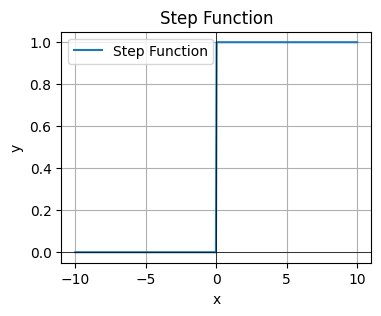

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Define the step function
y = np.where(x < 0, 0, 1)

# Plot the step function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Step Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Sign Function

มีฟังก์ชันอีกแบบที่ใช้ในช่วงแรก คือ Sign Function โดยจะมีหลักคิดว่าค่า 0 คือ ไม่มีข้อมูลออกไปเลย ดังนั้นควรจะบอกว่าผลลัพธ์เป็น บวก (Positive) หรือ ลบ (Negative) กันไปเลยจะได้มีความชัดเจน ดังนั้นหากมีการส่งสัญญาณก็จะได้ผลลัพธ์เป็น 1 แต่ถ้าไม่มีการส่งสัญญาณก็จะได้ผลลัพธ์เป็น -1 สามารถเขียนโปรแกรมเพื่อแสดงรูปแบบของ Sign Function ได้ดังนี้

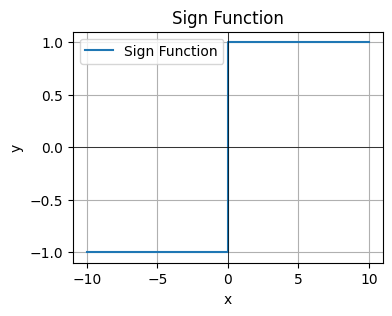

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Define the sign function
y = np.where(x < 0, -1, np.where(x > 0, 1, 0))

# Plot the sign function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='Sign Function', drawstyle='steps-post')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sign Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


ต่อมามีการนำ Perceptron หรือ Neuron มาสร้างเป็น Neural Network เพื่อปรับปรุงประสิทธิภาพการทำงาน ทำให้พบว่า Step Function หรือ Sign Function ไม่สะดวกต่อการนำไปใช้งานมากนัก เนื่องจากช่วงรอยต่อของค่าข้อมูล ไม่สามารถหา Gradient หรือไม่สามารถ diff ได้ จึงได้มีการนำเสนอรูปแบบของ Function ที่มีความต่อเนื่องเข้ามาใช้แทน

### Sigmoid Function

ฟังก์ชันที่มีการนำเสนอเป็นตัวแรก มีชือว่า Sigmoid Function ซึ่งจริงๆ ก็เป็นความพยายามทำให้ Step Function มีความต่อเนื่องนั่นเอง โดยเขียนเป็นสูตรคณิตศาสตร์ได้ดังนี้

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

เนื่องจากฟังก์ชันข้างต้นมี 1 เป็นเศษ และ 1+ $e^{-x}$ เป็นตัวหารดังนั้นหาก $e^{-x}$ มีค่าน้อย กราฟก็จะลู่เข้าหา 1 แต่หาก $e^{-x}$ มีค่ามาก กราฟก็จะลู่เข้าหา 0 รูปร่างหน้าตาของ Sigmoid เขียนเป็นโปรแกรมได้ดังนี้

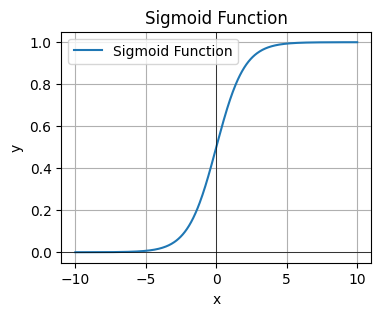

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate the corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


จะเห็นได้ว่า Sigmoid มีลักษณะคล้ายกับ Step Function แต่มีความต่อเนื่องมากกว่า และไม่เป็นเชิงเส้น (Non Linear ซึ่งทำให้สามารถนำไปประยุกต์ใช้ได้หลากหลายและซับซ้อนมากกว่าฟังก์ชันเชิงเส้น นอกจากนั้นจากค่าที่ไม่ใช่แค่ 0 หรือ 1 ยังสามารถบอกถึงความ "แรง" ของสัญญาณได้ด้วย หรือ อาจมองในแง่ของความน่าจะเป็นได้ด้วย และที่สำคัญคือ Sigmoid หาอนุพันธ์ (Derivative) หรือ diff ได้ ทำให้สามารถทำ Backward Part ของ Training Loop ได้สะดวกกว่า

แต่ปัญหาของ Sigmoid มีเรื่องหนึ่ง คือ ไม่มีค่า 0 เพราะถ้าดูจากราฟ หรือสมการ เมื่อ x เข้าสู่ infinity ค่า y จะลู่เข้าสู่ 1 แต่จะไม่มีวันเท่ากับ 1 และ เมื่อ x เข้าสู่ -infinity ค่า y จะลู่เข้าสู่ 0 แต่จะไม่มีวันเป็น 0 แต่จะมีค่าน้อยมากๆ ทำให้การปรับค่า weight ทำได้ช้า

Sigmoid เป็น Activation Function ที่นิยมใช้ในช่วงทศวรรษ 1980 และต้นทศวรรษ 1990

### TanH Function (Hyperbolic Tangent)

จะคล้ายกับ Sigmoid แต่จะมีค่าต่ำสุดลู่เข้าสู่ -1 หรืออาจมองได้ว่า TanH คล้ายกับ Sign Function ที่มีความต่อเนื่อง โดย TanH สามารถเขียนเป็นสูตรได้ดังนี้

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$


TanH ได้รับความนิยมต่อจาก Sigmoid และได้รับความนิยมมากในช่วงทศวรรษที่ 1990 เนื่องจากมีช่วงการทำงานที่กว้างมากกว่า Sigmoid ทำให้การหาค่าต่ำสุดทำได้เร็วมากกว่า และ มีประสิทธิภาพสูงกว่า Sigmoid

โดยรูปร่างหน้าตาของ TanH เขียนเป็นโปรแกรมได้ดังนี้

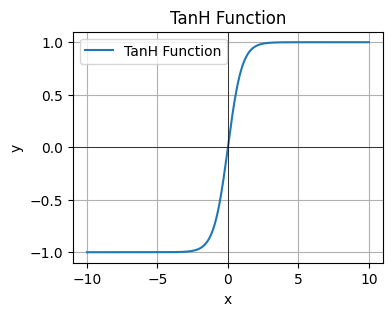

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the TanH function
def tanh(x):
    return np.tanh(x)

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate the corresponding y values using the TanH function
y = tanh(x)

# Plot the TanH function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='TanH Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('TanH Function')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


### Rectified Linear Unit (ReLU) Function

ReLu เป็น Activation Function ที่สำคัญที่สุด และ ใช้งานมากที่สุดในปัจจุบัน อาจพูดได้ว่าหากยังไม่ค่อยรู้อะไรมาก หรือไม่รู้จะใช้ Activation Function แบบไหนดี ก็ใช้ ReLu ไว้ก่อนได้เลย

ReLu จะมีหน้าตาเหมือนกราฟ y=x เพียงแต่ตัดส่วนที่เป็นลบออกไป ข้อดีของ ReLu มี 2 ประการ คือ
1) มีความเร็วในการทำงานที่สูงกว่า เนื่องจากไม่ซับซ้อน ทำให้ทำงานได้เร็วกว่า Sigmoid หรือ TanH
2) เนื่องจากไม่ถูกจำกัดค่า ไว้ที่ 1 ทำให้การทำงานเข้าสู่ (convergence) จุดต่ำสุดได้เร็วกว่า

Relu มีชื่อเสียงเนื่องจากมีการแข่งขันหนึ่งเรียกว่า ImageNet ซึ่งเป็นแข่งขันระดับโลก โดยมีจำนวน dataset รูปภาพถึง 1.2 ล้านภาพ โดยแบ่งออกเป็น 1000 ประเภท (class) ความสำคัญคือในปี 2012 ได้มีการนำเอา Neural Network ที่มี ReLu เป็น Activation Function มาใช้ ในชื่อของ AlexNet และเป็นผู้ชนะในปีนั้น ซึ่งจากกราฟจะเห็นได้ว่ามีความถูกต้องสูงขึ้นแบบก้าวกระโดด ในการแยกแยะประเภทภาพ เมื่อใช้คนแยกแยะพบว่ามีความผิดพลาดประมาณ 5 เปอร์เซ็นต์ (บางส่วนเกิดจากความกำกวมของภาพเอง) แต่การแข่งขันนี้ได้ยกเลิกในปี 2018 เนื่องจากคอมพิวเตอร์สามารถทำนายรูปได้ถูกต้องมากแล้ว (อีกนัยหนึ่งคือโจทย์นี้ไม่ค่อยท้าทายแล้ว)

ImageNet URL : https://www.image-net.org/

<div>
<br>
<img src="https://www.researchgate.net/publication/346091812/figure/fig2/AS:979480482938881@1610537753860/Algorithms-that-won-the-ImageNet-Large-Scale-Visual-Recognition-Challenge-ILSVRC-in.png" width="600"/>
<br>
</div>


โดยรูปร่างหน้าตาของ ReLu เขียนเป็นโปรแกรมได้ดังนี้

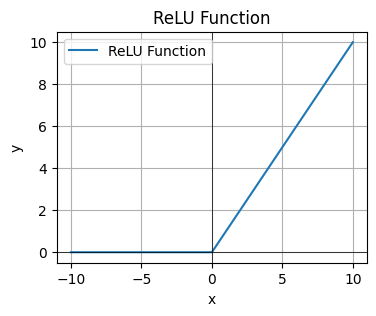

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate the corresponding y values using the ReLU function
y = relu(x)

# Plot the ReLU function
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='ReLU Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('ReLU Function')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


### Activation Function อื่นๆ

นอกเหนือจาก Activation Function ต่างๆ ที่ได้กล่าวมาแล้ว ยังมี Activation Function อื่นๆ อีกหลายแบบ ตามรูปด้านล่างนี้ ซึ่งจะมีบางแบบที่จะอธิบายต่อไป แต่เนื่องจากมีจำนวนแบบมาก (มีมากกว่าในรูป) จึงจะกล่าวถึงเฉพาะที่นิยมใช้กัน

<div>
<br>
<img src="https://miro.medium.com/v2/resize:fit:2000/1*o_NgoypRNIgbtIJKragCmQ.png" width="400"/>
<br>
</div>

[Wiki](https://en.wikipedia.org/wiki/Activation_function)


## บทบาทของ Activation Function

เพื่อให้เข้าใจบทบาทและความสำคัญของ Activation Function จะขอยกตัวอย่างของข้อมูลที่เป็นรูปแบบ Sine โดยสมมติว่า 1) การเรียนรู้ของ Neural Network สิ้นสุดลงแล้วและได้ค่า weight แล้ว 2) ค่า weight ที่ได้จากการเรียนรู้เป็นค่าอุดมคติ



### กราฟของ 1 Neuron

เราจะเริ่มด้วย 1 Neuron ที่ประกอบด้วย 1 Input, 1 Weight และ 1 Bias และ มี Activation Function เป็น ReLu สมมติว่าค่า Weight มีค่าเป็น 0 และ Bias มีค่าเป็น 0 ค่า y หรือ ผลลัพธ์ที่ได้จะมีหน้าตาตามรูป

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_12.png" width="500"/>
<br>
</div>

แต่หากเปลี่ยนค่า Weight เป็น 1 ค่า y หรือ ผลลัพธ์ที่ได้จะมีหน้าตาตามรูป

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_13.png" width="500"/>
<br>

จะเห็นได้ว่าเมื่อ $w_1 = 1$ ก็คือ สมการ y=x นั่นเอง แต่เมื่อผ่าน ReLu ซี่งมีหน้าที่ขจัดค่าลบออกไป ดังนั้นผลลัพธ์ส่วนที่ y เป็นลบ จึงถูกปรับให้เป็น 0 เส้นกราฟจึงเป็นตามรูป คราวนี้เราจะเพิ่มค่า Bias หรือ b เข้าไป โดยกำหนดให้ b เป็น 0.5

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_14.png" width="500"/>
<br>

จะเห็นว่าเส้นกราฟยังมีความชันเท่าเดิม แต่เส้นกราฟถูกยกขึ้นไป 0.5 และไปตัดแกน y ที่ 0.5 คราวนี้สมมติว่าค่า $w_1$ เป็น -1

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_15.png" width="500"/>
<br>

จะเห็นว่ากราฟมีรูปแบบเดิม แค่จะหันไปคนละด้าน เพราะความชันเป็น -1


### เพิ่มเป็น 2 Neuron

คราวนี้เราจะเพิ่มเป็น 2 Neuron

เริ่มต้นให้ Neuron ที่ 2 รับ Input ต่อจาก Neuron ที่ 1 โดยเริ่มต้นกำหนดให้ $w_2$ = 1 และ $b_2$ = 0 ซึ่งแปลว่า Input จาก Neuron ที่ 1 ส่งมาอย่างไร ก็จะไม่มีการเปลี่ยนแปลง (หากไม่มีข้อมูลที่เป็นลบ) ดังนั้นกราฟ output y จะมีรูปร่างเดิม

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_16.png" width="500"/>
<br>

ทดลองเปลี่ยน $w_2$ เป็น -2 และเปลี่ยน $b_2$ เป็น 1 จะเห็นว่า
1. กราฟจากรูปเดิมจะพลิกกลับข้างตามแนวแกน x เนื่องจากคูณด้วยค่าลบ
2. จุดตัดแกน y ที่เดิมเป็น 0.5 จะกลายเป็น 1 เนื่องจากคูณด้วย 2 (ความชันเพิ่มขึ้น)
3. ทั้งกราฟถูกยกขึ้นมา 1 เนื่องจากบวกด้วย bias=1
4. ส่วนที่มีค่าน้อยกว่า 1 ถูกตัดทิ้งโดย ReLu

น่าตื่นเต้นมั้ยครับที่ฟังก์ชันที่ทำงานอย่างเรียบง่าย สามารถสร้างแบบนี้ขึ้นมาได้

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_18.png" width="500"/>
<br>

จะเห็นว่า neuron มีความสามารถในการ activation หรือ มีผลต่อการทำงาน และ deactivation คือ ให้ไม่มีผลต่อการทำงาน neuron แต่ละตัวจะใช้ ReLu ในการกำหนดส่วนที่ activation และ deactivation แต่ส่วนที่ Nueron ทั้งสองตัว ช่วยกันสร้างส่วนที่มีผลต่อการทำงาน จะเรียกว่า “area of effect” ซึ่งจะทำให้เกิดข้อมูลเฉพาะในช่วงที่ neuron ทั้งสอง activate และถ้า neuron ตัวใดตัวหนึ่งไม่ activate ก็จะไม่เกิดข้อมูลออกมา


<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_19.png" width="500"/>
<br>





### จำลองโดยโปรแกรม

มาลองกันหน่อยว่า ทำได้จริงตามที่อธิบายมาหรือไม่ โปรแกรมนี้ได้สร้าง Neuron อย่างง่ายๆ โดยใช้ Activation Function เป็น ReLu โดยมี Nueron จำนวน 2 ตัวต่อเชื่อมกันอยู่ โดยป้อนข้อมูลตามในรูป



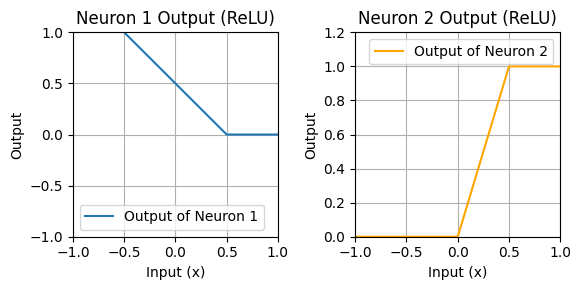

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class SingleNeuron:
    def __init__(self, input_size, weights=None, bias=None):
        # Initialize weights and bias
        self.weights = np.zeros(input_size) if weights is None else np.array(weights)
        self.bias = 0.0 if bias is None else bias

    def relu(self, z):
        # ReLU activation function
        return np.maximum(0, z)

    def forward(self, x):
        # Linear combination
        z = np.dot(self.weights, x) + self.bias
        # Apply ReLU activation function
        y = self.relu(z)
        return y

    def __call__(self, x):
        # Makes the object callable
        return self.forward(x)

# Create the first neuron with specified weights and bias
neuron1 = SingleNeuron(input_size=1, weights=[-1], bias=0.5)

# Create the second neuron with specified weights and bias
neuron2 = SingleNeuron(input_size=1, weights=[-2], bias=1)

# Generate input values from -1 to 1 with a step of 0.01
x_values = np.arange(-1, 1.01, 0.01)
outputs1 = []
outputs2 = []

# Compute outputs for each x value
for x in x_values:
    output1 = neuron1(np.array([x]))
    outputs1.append(output1)
    output2 = neuron2(np.array([output1]))
    outputs2.append(output2)

# Plot the outputs
plt.figure(figsize=(6, 3))

# Plot for Neuron 1
plt.subplot(1, 2, 1)
plt.plot(x_values, outputs1, label='Output of Neuron 1')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Neuron 1 Output (ReLU)')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.legend()

# Plot for Neuron 2
plt.subplot(1, 2, 2)
plt.plot(x_values, outputs2, label='Output of Neuron 2', color='orange')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Neuron 2 Output (ReLU)')
plt.xlim(-1, 1)
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### บทบาทของ Activation ในข้อมูลรูปแบบ sine

(ภาพจากหนังสือ Neural Network from Scratch in Python)
คราวนี้เรามาดูตัวอย่างที่ซับซ้อนมากขึ้น โดยจะวาง Neuron ออกเป็น 2 Layer โดยมี Layer ละ 8 Neuron และมี Input 1 Node กับ Output อีก 1 Node ตามรูป โดยข้อมูลที่นำเข้ามาทาง Input คือ ค่าของ x ที่เป็นไปตามสมการ y = sin(x) และให้ Neural Network หาค่า weight ในอุดมคติเพื่อจำลอง sine wave ได้

เราจะเริ่มเหมือนเดิม คือ ให้ค่า weight และ bias เริ่มต้นเป็น 0 ก็จะได้กราฟ y=0

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_20.png" width="500"/>
<br>

สมมติว่าค่า $w_{11}$ เป็น 6 และ $b_{11}$ เป็น 0 กราฟ output ที่ได้ก็จะเป็นตามรูป

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_22.png" width="500"/>
<br>

ต่อมาให้ค่า $b_{21}$ เป็น 0.7 จะเป็นผลให้มีการยกกราฟเดิมขึ้นอีก 0.7

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_23.png" width="600"/>
<br>

และ ถ้า $w_{21}$ เป็น -1 ก็จะเป็นผลให้กราฟเกิดการพลิกกลับด้าน และ ส่วนที่ต่ำกว่า 0 ก็จะถูกตัดออกไป (deactivate)

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_24.png" width="600"/>
<br>

คราวนี้เราต้องการให้ Slope กลับมา จึงกำหนดให้  $w_{31}$ เป็น -1 ก็จะเกิดการพลิกกลับของกราฟตามรูป

<div>
<br>
<img src="https://wikidocs.net/images/page/181782/Fig_04_25.png" width="600"/>
<br>

คราวนี้จะเห็นว่า Neuron ของ Hidden Layer จำนวน 2 ตัว และ Output Layer อีก 1 ตัว ถูกใช้จนหมดแล้ว ดังนั้นจะเพิ่มบทบาทของ Neuron ตัวล่างสุด โดยกำหนด $b_{28}$ เป็น 1 และกำหนดค่า $w_{38}$ ให้เป็น 0.7 ก็จะทำให้กราฟถูกยกขึ้นมา 0.7 หน่วยตามรูป

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.26.jpg?raw=true" width="500"/>
<br>

จะเห็นว่าสามารถสร้างกราฟส่วนที่ 1 ขึ้นมาได้แล้ว คราวนี้ก็จะเริ่มทำกราฟส่วนที่ 2 ต่อไป คราวนี้เราจะใช้งาน Neuron คู่ที่ 2 โดยกำหนดให้ $w_{12}$ เท่ากับ 1 และ $w_{22}$ เท่ากับ 1 และ $w_{32}$ เท่ากับ 1 จะทำให้เกิดกราฟตามรูป

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.27.jpg?raw=true" width="500"/>
<br>

จะเห็นว่า area of effect ของคู่ที่ 2 เริ่มต้นเร็วเกินไป ทำให้มีผลกระทบกับการทำงานของคู่ที่ 1 ดังนั้นเราจะปรับให้การทำงานของคู่ที่ 2 เริ่มต้นในตำแหน่งที่การทำงานของคู่ที่ 1 ไม่มีผลแล้ว (deactivate) ดังนั้นเราจะปรับ $w_{12}$ เป็น 3.5 และปรับ $b_{12}$ เป็น -0.42 จะทำให้กราฟส่วนที่ 2 ต่อกับกราฟส่วนที่ 1 พอดี

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.28.jpg?raw=true" width="500"/>
<br>

คราวนี้เราจะใช้วิธีเดิมกับคู่แรก โดยการกำหนดให้ $w_{22}$ เป็น -1 เพื่อให้เกิดการพลิกกลับของส่วนที่ 2 และ $b_{22}$ เป็น 0.27

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.29.jpg?raw=true" width="500"/>
<br>

ต่อไปเราจะพลิกกลับส่วนที่ 2 โดยกำหนด $w_{32}$ เป็น -1

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.30.jpg?raw=true" width="500"/>
<br>

จากนั้นปรับ Neuron คู่ล่างสุด เพื่อยกกราฟขึ้นทั้งกราฟเหมือนเดิม โดยปรับ $w_{38}$ เป็น 0.97

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.31.jpg?raw=true" width="500"/>
<br>

ทำตามวิธีเดิมกับ Neuron คู่ที่ 3 จะได้กราฟดังนี้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.32.jpg?raw=true" width="500"/>
<br>

ทำตามวิธีเดิมจนครบทุกคู่ ก็จะได้กราฟที่คล้ายกับรูป Sine ตามรูป

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.33.jpg?raw=true" width="500"/>
<br>

รูปด้านล่างนี้จะแสดง area of effect คือ การที่ Neuron แต่ละตัวมีบทบาทมากหรือน้อยกับกราฟส่วนไหน จะเห็นว่าหากกำหนดค่า x เป็น 0.08 จะมีเฉพาะ Neuron คู่แรกเท่านั้นที่มีผลการทำงาน ส่วนคู่อื่นๆ จะทำงานไม่ครบคู่

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.34.jpg?raw=true" width="500"/>
<br>

อีกตัวอย่างของค่า x ที่เป็นค่าอื่น จะเห็นว่าจะมี Neuron คู่อื่นที่มีผลกับการทำงานแทน

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.35.jpg?raw=true" width="500"/>
<br>

อย่างไรก็ตามใน Neuron Network ของจริง เราจะไม่กำหนดให้ทำงานเป็นคู่ๆ แบบนี้ เพราะการเขียนโปรแกรมทำได้ยากกว่า ที่ยกตัวอย่างการทำงานเป็นคู่ๆ ก็เพื่อให้เห็นภาพการทำงานได้ง่ายกว่าเท่านั้น

ใน Neuron Network ของจริง จะใช้ Neuron Network แบบที่เรียกว่า Fully Connected Layer หรือ FCNN ซึ่งแสดงตามรูป

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/Fig 4.36.jpg?raw=true" width="500"/>
<br>

ซึ่งก็จะได้ผลการทำงานที่ไม่ต่างกัน แต่เขียนโปรแกรมได้ง่ายกว่า
จะขอยกอีก 1 ตัวอย่างให้เห็นการทำงานใน Neural Network ว่าจริงๆ แล้วโดยภาพรวมก็คือการแบ่งกันจำ หรือ แบ่งกันรับผิดชอบการทำงาน เพื่อจดจำรูปแบบของข้อมูลไปคนละส่วนนั่นเอง

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/spiral.JPG?raw=true" width="800"/>
<br>

อย่างไรก็ตามที่ยกตัวอย่างมาทั้งหมด เป็น Hand Operate คือ ทำด้วยมือมนุษย์ จึงสามารถกำหนดตัวเลขได้ตามที่คิดเพื่อให้ได้ output ตามต้องการ แต่อย่าลืมว่าในการทำงานจริง Neural Network ทำงานด้วยการสุ่มและปรับ weight ผ่านกระบวนการ backpropagation จึงไม่มีทางจะทำงานได้ดีเหมือนกับมนุษย์ ดังนั้นในการทำงานจริง เพียงแค่ 8 Neuron กับ 2 Layer จะทำงานให้ได้ผลลัพธ์ตามนี้ได้ยาก ดังนั้นในการทำงานจริงจึงมักใช้ Neuron มากกว่านี้


## Backpropagation

Backpropagation เป็นวิธีในการปรับ weight และ bias หากยังจำกันได้ ในการเรียนครั้งที่ 1 เราหาอนุพันธ์ (derivative) ของฟังกชัน sum of square error เพื่อใช้ปรับ weight แต่นั่นเป็น Perceptron หรือ Neuron เพียง Node เดียว แต่ในโปรแกรมนี้มี Neuron ถึง 37 Node ซึ่งหากเขียนในรูปของ Function ก็จะยาวมาก และ การหาอนุพันธ์ของฟังกชันที่ยาว ก็จะยากขึ้น และ ไม่ต้องกล่าวถึงโจทย์ที่ซับซ้อนกว่านี้ ในโปรแกรมนี้ เรามีพารามิเตอร์ ทั้งหมด = 16 * 20 +  16 + 20 + 37 หรือประมาณ 400 พารามิเตอร์เท่านั้น แต่ในโมเดลที่มีการใช้งานที่ซับซ้อน อาจมีพารามิเตอร์เป็นล้าน ไปจนถึงพันล้านพารามิเตอร์ ซึ่งเรียกว่าการหาอนุพันธ์แทบจะเป็นไปไม่ได้เลยทีเดียว

ดังนั้นวิธีการที่นักคอมพิวเตอร์ใช้ คือ Backpropagation ซึ่งก็คือการคำนวณค่าอนุพันธ์และส่งค่ากลับทีละ step

เพื่อให้เห็นการทำงานที่ชัดเจนขึ้น จะขอลดรูปของ Neural Network ที่ใช้จาก 16x20 เหลือเพียง 3 ตัว เพื่อใช้ในการอธิบาย และจะยังไม่ใช้ activation function โดยเมื่อรับข้อมูล x = 0.1 และสมมติค่าสุ่มตามรูป เมื่อแต่ละ Node รับข้อมูลก็จะคำนวณ จะได้ผลลัพธ์ ซึ่งแสดงเป็นรูปภาพการทำงานใน Loop แรกได้ดังนี้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN2.JPG?raw=true" width="600"/>
<br>
</div>

- ข้อมูล x ตัวแรก คือ 0.1 ซึ่งจะเป็น Input ป้อนให้กับ Neuron ใน Hidden Layer ทั้ง 3 ตัว  
- สมมติว่า ค่า weight เริ่มต้นระหว่าง Input Layer กับ Hidden Layer คือ 0.2, 0.3 และ 0.5 (ในการทำงานจริงจะเป็นค่าสุ่ม) โดยค่า weight จะเก็บไว้ใน Nueron แต่รูปนำมาเขียนไว้บนเส้น เพื่อให้ดูง่าย
- เมื่อค่า x ผ่าน Neuron จะถูกนำมาคูณกับ weight ของแต่ละเส้น จากนั้นนำมาบวกกับ bias 0.1 จะได้ Output ออกจาก Hidden Layer เป็น 0.12, 0.13 และ 0.15 ตามรูป
- จากนั้นนำ Output จาก Hidden Layer แต่ละเส้นมาคูณกับค่า weight ของแต่ละเส้นแล้วนำมาบวกกัน แล้วนำมาบวกกับ bias จะได้ (0.12 x 0.12)+0.1 + (0.13 x 0.23)+0.1 + (0.15 x 0.34)+0.1 จะได้เป็น 0.3953

เป็นอันจบส่วนของ forward pass

### Forward Pass in Detail

คราวนี้ลองมาดูการทำงานของ forward pass ใน รายละเอียดดูบ้าง โดยจะนำโครงสร้างภายในของ Neuron ที่ได้อธิบายไปก่อนหน้านี้มาอธิบาย

จากรูปที่ผ่านมา หากเรานำเอาข้อมูลมาวางใน node สุดท้าย (สีแดง) จะได้ข้อมูลที่อยู่ภายใน Neuron ดังนี้ (กรณีจะสมมติว่า Activation Function = คูณ 1)  

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN5.JPG?raw=true" width="400"/>
<br>
</div>




### ขั้นตอนการทำ Backpropagation
จากรูป เราจะมองแต่ละองค์ประกอบเป็น Function ดังนั้น

y = f_add(f_mul(w1,x1),f_mul(w2,x2), f_mul(w3,x3), bias)

ซึ่งมีลักษณะเป็น Fuction ซ้อน Function ซึ่งจากหลักของการหาอนุพันธ์ของฟังก์ชันซ้อน เราจะใช้เครื่องมือที่เรียกว่า chain rule โดยเราจะหา derivative เป็นชั้นๆ ตามสมการ

$\frac{dz}{dx} = \frac{dz}{dy} \times \frac{dy}{dx}$

ในที่นี้สิ่งที่ต้องต้องการหาคือ gradient ของ y เทียบกับ w1, w2, w3 แต่เนื่องจากฟังก์ชัน y ไม่ได้มาจาก x โดยตรง แต่มาจาก g(f(x)) ดังนั้นเราจึงแตกออก 2 ฟังก์ชัน และหาอนุพันธ์ 2 ครั้ง โดยจะทำตามลำดับดังนี้

1. กำหนดฟังก์ชันการคูณ

   $\ z1 = f_{\text{mul}}(w1, x1) = w1 \cdot x1 \$
   
   $\ z2 = f_{\text{mul}}(w2, x2) = w2 \cdot x2 \$
    
   $\ z3 = f_{\text{mul}}(w3, x3) = w3 \cdot x3 \$

2. กำหนดฟังก์ชันการบวก
   $\ y = f_{\text{add}}(z1, z2, z3, \text{bias}) = z1 + z2 + z3 + \text{bias}  \$

3. หาอนุพันธ์เทียบกับ w1 เนื่องจาก y เป็นผลรวมของ z1, z2, z3 และ bias ดังนั้น
$\\frac{\partial y}{\partial z1} = 1\$

4. หาอนุพันธ์ของ z1 เทียบ w1 เนื่องจาก $ z1 = w1 \cdot x1$ ดังนั้น

&emsp;&emsp;$\ \frac{\partial z1}{\partial w1} = x1 $

5. ใช้ chain rule โดยนำอนุพันธ์ที่ได้ทั้ง 2 ตัวมาคูณกัน

&emsp;&emsp;
$\
\frac{\partial y}{\partial w1} = \frac{\partial y}{\partial z1} \cdot \frac{\partial z1}{\partial w1} = 1 \cdot x1 = x1
\$

6. ในการหาอนุพันธ์เทียบกับ w2 ก็ทำเช่นเดียวกัน ดังนั้นจะได้

&emsp;&emsp;
$\
\frac{\partial y}{\partial w2} = \frac{\partial y}{\partial z2} \cdot \frac{\partial z2}{\partial w2} = 1 \cdot x2 = x2
\$

7. ในการหาอนุพันธ์เทียบกับ w3 ก็ทำเช่นเดียวกัน ดังนั้นจะได้

&emsp;&emsp;
$\
\frac{\partial y}{\partial w3} = \frac{\partial y}{\partial z3} \cdot \frac{\partial z3}{\partial w3} = 1 \cdot x3 = x3
\$

8. หาอนุพันธ์เทียบกับ bias เนื่องจาก bias บวกเข้ากับ output y โดยตรง
&emsp;&emsp;
$\
\frac{\partial y}{\partial \text{bias}} = 1
\$

9. สรุปทุกอนุพันธ์

&emsp;&emsp;$\ \frac{\partial y}{\partial w1} = x1 \$

&emsp;&emsp;$\ \frac{\partial y}{\partial w2} = x2 \$

&emsp;&emsp;$\ \frac{\partial y}{\partial w3} = x3 \$

&emsp;&emsp;$\ \frac{\partial y}{\partial \text{bias}} = 1 \$



### Backward pass in detail

เมื่อเราได้ค่าอนุพันธ์ในแต่ละตำแหน่ง คราวนี้เราก็จะมาใส่ค่าให้กับ backward pass

- ค่าอนุพันธ์ของ output จะเท่ากับ 1 เสมอ เพราะเทียบกับตัวเอง
- ค่าอนุพันธ์ของ bias เท่ากับ 1 ตามข้อ 9 ด้านบน
- ค่า 1.0 จะไหลมาที่ output ของ function บวก
- ค่า w1, w2, w3 = 0.12, 0.13, 0.15

ค่า x ไม่ได้นำไปใช้งานเนื่องจากเป็น input เราจะปรับพารามิเตอร์เฉพาะ weight กับ bias เท่านั้น

จากผลการทำงาน ตั้งข้อสังเกตดังนี้
- หากเป็นการคูณ ค่าของอนุพันธ์ตาม backpropagation จะเป็นการสลับระหว่าง x1 กับ w1 คูณกับ output เนื่องจากกรณีนี้ output เป็น 1 จึงเหมือนการสลับที่เฉยๆ
- หากเป็นการบวก ค่าของอนุพันธ์ตาม backpropagation จะเป็นการปล่อยค่า output ไหลกลับเข้ามาเฉยๆ

อนึ่ง เนื่องจากยังไม่ได้กล่าวถึง Activation Function จึงยังดูไม่ยาก อย่างไรก็ตาม แม้จะเพิ่ม Activation Function ก็เป็นเพียงการหาอนุพันธ์เพิ่มอีก 1 ชั้นเท่านั้น

กรณีที่มี Neuron หลาย Layer ค่าต่างๆ ก็จะต้องไหลต่อไปยัง Neuron ชั้นก่อนหน้าด้วย ดังนั้นไม่ว่าจะมี Neuron กี่ชั้น ก็สามารถใช้วิธีการนี้ได้

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN6.JPG?raw=true" width="500"/>
<br>
</div>



### Back Propagation กับ Activation Function

ที่ผ่านมาได้อธิบายการทำงานของ Back Propagation กับการบวกและการคูณ โดยไม่ได้กล่าวถึงการทำ Back Propagation กับ Activation Function

จะขอกล่าวเฉพาะ Activation Function 3 แบบ คือ Sigmoid, TanH และ RuLu เท่านั้น

1. Sigmoid Function มีสูตรดังนี้

&emsp;&emsp;$\ \sigma(x) = \frac{1}{1 + e^{-x}} \$

&emsp;&emsp;อนุพันธ์ของ sigmoid คือ

&emsp;&emsp;$\ \sigma'(x) = \sigma(x) \cdot (1 - \sigma(x)) \$

เขียนเป็นโปรแกรมในส่วนของ backward ได้ดังนี้

```
    def backward(self, X, top_diff):
        output = self.forward(X)
        return output * (1 - output) * top_diff
```

2. Tanh Function มีสูตรดังนี้

&emsp;&emsp;$\ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \$

&emsp;&emsp;อนุพันธ์ของ TanH คือ

&emsp;&emsp;$\ \frac{d}{dx} \tanh(x) = 1 - \tanh^2(x) \$

เขียนเป็นโปรแกรมในส่วนของ backward ได้ดังนี้

```
    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - np.square(output)) * top_diff
```        

3. ReLU (Rectified Linear Unit) Function มีสูตรดังนี้

&emsp;&emsp;$\ \text{ReLU}(x) = \max(0, x) \$

&emsp;&emsp;อนุพันธ์ของ ReLu คือ

&emsp;&emsp; $\ \text{ReLU}'(x) = \begin{cases}
0 & \text{if } x \leq 0 \\
1 & \text{if } x > 0
\end{cases} \ $

เขียนเป็นโปรแกรมในส่วนของ backward ได้ดังนี้

```
    def backward(self, X, top_diff):
        return (X > 0).astype(float) * top_diff
```    

### แสดงการทำงานโดยละเอียดในส่วน Forward Pass รวม Activation Function

อ้างอิงจากรูปของ Neural Network ก่อนหน้านี้

<img src="https://github.com/khthana/AI_resource/blob/main/NN7.JPG?raw=true" width="400">

- In มีค่าเท่ากับ [0.5​]
- ค่า weight ของโหนด 1, 2, 3, 4 เท่ากับ [0.1], [-​0.2], [​0.3], [​0.4​] ตามลำดับ
- ค่า bias ของโหนด 1, 2, 3, 4 เท่ากับ 0.01, 0.02, 0.03, 0.04 ตามลำดับ
- ค่า weight ของโหนด 5 เท่ากับ [0.1, 0.3, 0.5, 0.7]
- ค่า weight ของโหนด 6 เท่ากับ [-0.1, -0.3, -0.5, -0.7]
- ค่า weight ของโหนด 7 เท่ากับ [0.2, 0.4, 0.6, 0.8]
- ค่า weight ของโหนด 8 เท่ากับ [-0.2 , -0.4 , -0.6 , -0.8]
- ค่า bias ของโหนด 5, 6, 7, 8 เท่ากับ 0.1 ทั้งหมด

**Hidden Layer 1:**
- Weights: [0.1,−0.2,0.3,0.4]
- Biases: [0.01,0.02,0.03,0.04]

*Calculations for each node (ReLU activation):*

| Node | Detail |   
|------|--------|
| 1    | ReLU(0.5 × 0.1 + 0.01) = ReLU(0.05 + 0.01) = ReLU(0.06) = 0.06 |
| 2    | ReLU(0.5 × −0.2 + 0.02) = ReLU(−0.1 + 0.02) = ReLU(−0.08) = 0|
| 3    | ReLU(0.5 × 0.3 + 0.03) = ReLU(0.15 + 0.03) = ReLU(0.18) = 0.18|
| 4    | ReLU(0.5 × 0.4 + 0.04) = ReLU(0.2 + 0.04) = ReLU(0.24) = 0.24|


- Outputs of hidden layer 1: [0.06, 0, 0.18, 0.24]

**Hidden Layer 2:**

*Calculations for each node (ReLU activation):*

| Node | Detail |   
|------|--------|
| 5    | ReLU(0.06 × 0.1 + 0 × 0.3 + 0.18 × 0.5 + 0.24 × 0.7 + 0.1)     |   
|      | ReLU(0.006 + 0 + 0.09 + 0.168 + 0.1)       |  
|      | ReLU(0.364) = 0.364       |  
| 6    | ReLU(0.06 × -0.1 + 0 × -0.3 + 0.18 × -0.5 + 0.24 × -0.7 + 0.1)     |   
|      | ReLU(−0.006 + 0 −0.09 −0.168 + 0.1)     |
|      | ReLU(−0.164) = 0     |
| 7    | ReLU(0.06 × 0.2 + 0 × 0.4 + 0.18 × 0.6 + 0.24 × 0.8 + 0.1)|
|      | ReLU(0.012 + 0 + 0.108 + 0.192 + 0.1)|
|      | ReLU(0.412) = 0.412|
| 8    | ReLU(0.06 × −0.2 + 0 × −0.4 + 0.18 × −0.6 + 0.24 × −0.8 + 0.1)|
|      | ReLU(−0.012 + 0 −0.108 −0.192 + 0.1)|
|      | ReLU(−0.212) = 0|

- Outputs of hidden layer 2: [0.364,0,0.412,0]

**Output Layer:**

*Calculations for each node (ReLU activation):*

- ค่า weight ของ output layer = [0.1, 0.2, 0.3, 0.4] และ bias = 0.1

| Node | Detail |   
|------|--------|
| Output | ReLU(0.364 × 0.1 ​+ 0 × 0.2 ​+ 0.412× 0.3 ​+0 × 0.4 ​+ 0.1) |
|   | ReLU(0.364 × 0.1 + 0.412 × 0.3 + 0.1) |
|   | ReLU(0.0364 + 0.1236 + 0.1) |
|   | ReLU(0.26)=0.26 |


### แสดงการทำงานโดยละเอียดในส่วน Backward Pass รวม Activation Function

ในส่วนของ Backward Pass เราจะย้อนกลับจาก output โดยจะใช้ Mean Squared Error (MSE) เป็น Loss Function และสมมติให้ target value (t) เท่ากับ 0.5

>  Loss $L =  \frac{1}{2}(y-t)^2 $

> L = $\frac{1}{2}(0.26-0.5)^2 = \frac{1}{2}(-0.24)^2 = 0.288$

**คำนวณ gradient**
1. output layer

> $\frac{∂L}{∂y}=y−t=0.26−0.5=−0.24$

> หาอนุพันธ์ของ Activation Function ReLU (output > 0, ดังนั้น อนุพันธ์  = 1)

> $\frac{∂L}{∂z}​=\frac{∂L}{∂y}​⋅\frac{∂y}{∂z}​=−0.24⋅1=−0.24$

> ดังนั้น gradient ของ output layer คือ -0.24

2. Weights and Bias ของ Output Layer

> ต่อไปจะหา gradient ของ $w_1,w_2,w_3,w_4$ และ bias ของ output node เทียบกับ L

> $\frac{∂L}{∂w_1}​=\frac{∂L}{∂z}​⋅\frac{∂z}{∂w_1}​=−0.24⋅0.364=−0.08736$

> $\frac{∂L}{∂w_2}​=\frac{∂L}{∂z}​⋅\frac{∂z}{∂w_2}​=−0.24⋅0=0$

> $\frac{∂L}{∂w_3}​=\frac{∂L}{∂z}​⋅\frac{∂z}{∂w_3}​=−0.24⋅0.412=−0.09888$

> $\frac{∂L}{∂w_4}​=\frac{∂L}{∂z}​⋅\frac{∂z}{∂w_4}​=−0.24⋅0=0$

> $\frac{∂L}{∂b}​=\frac{∂L}{∂z}​​=−0.24$

แสดงได้ดังภาพ

<div>
<br>
<img src="https://github.com/khthana/AI_resource/blob/main/NN11.JPG?raw=true" width="500"/>
<br>
</div>

ดังนั้นในรอบต่อไปเมื่อมีการปรับ weight จะมีการปรับ weight ดังนี้

- w1​: −0.08736
- w2: 0
- w3: −0.09888
- w4: 0
-Bias: b:−0.24

จากสูตร $ w_1' = w_1 - \eta \cdot \frac{\partial L}{\partial w_1} $

สมมติเลือก learning rate เป็น 0.1

$w1′​=0.1−0.01⋅(−0.08736)=0.1+0.0008736≈0.1009$

นี่เป็นตัวอย่างการทำงานของ backpropagation ของ backward pass ซึ่งจะนำไปใช้ในการปรับ weight ของรอบต่อไป

### Backward function ใน class Neuron

หลังจากที่อธิบาย Backpropagation ไปแล้ว ก็ขอย้อนกลับมาที่ฟังก์ชัน backward ที่ค้างการอธิบายเอาไว้ ซึ่งโปรแกรมส่วนนี้มีดังนี้

```
    def backward(self, dA):
        if self.activation:
            dZ = self.activation.backward(self.Z, dA)
        else:
            dZ = dA
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        return dW, db, dX
```

- ส่วนแรกเป็นการตรวจสอบว่ามีการใช้ activation function หรือไม่ หากมีสั่งให้หาอนุพันธ์ของ activation function และนำค่า dA ส่งเข้าไป โดย dA คือค่าที่ได้จากอนุพันธ์ของ Loss Function
- แต่หากไม่มีก็ส่งเข้ามาที่ Neuron เลย ในบรรทัด ```dW = np.dot(self.X.T, dZ)``` เป็นการหา gradient ของ loss เทียบกับ weight โดย X จะเก็บค่าของ input ที่เข้าสู่ Nueron และ dZ เป็น gradient ของ loss เทียบกับ output ของ Nueron เมื่อจับมาคูณกันจึงเป็นการทำตาม chain rule นั่นเอง
- บรรทัด ```db = np.sum(dZ, axis=0, keepdims=True)``` เป็นการหา gradient เทียบกับ bias
- บรรทัด ```dX = np.dot(dZ, self.W.T)```เป็นการหา gradient เทียบกับ Input

จากนั้นจึงส่งค่าของ gradient ที่คำนวณแล้วภายใน Nueron ของ Layer นี้ คืนไป เพื่อนำไป backword กับ layer ก่อนหน้าต่อไปจนจบ

โปรแกรมส่วนนี้ หากยังไม่เข้าใจมากนักก็ไม่เป็นไร เพราะในการเขียนโปรแกรมจริง เราจะไม่เขียนแบบนี้ แต่จะใช้ Library ที่ใช้ง่ายมากขึ้น ซึ่งจะได้กล่าวต่อไป






### แสดงการทำงานของ backward

เพื่อให้เห็นภาพ จะแสดงการทำงานของ output layer ตามที่แสดงข้างต้น

X = [[0.364, 0, 0.412, 0]]

W = [[0.1], [0.2], [0.3], [0.4]]

b = 0.1

เนื่องจากสมมติว่า ค่าเป้าหมาย คือ 0.5
ดังนั้น dA =  A - target = 0.26 - 0.5 = -0.24
- คำนวณ dZ: เนื่องจาก Z > 0, derivative ของ ReLU คือ 1
dZ = dA * 1 = -0.24
- คำนวณ dW: dW = np.dot(self.X.T, dZ) เนื่องจาก X กับ Z อาจเป็นมิติแบบเดียวกัน คือ เป็นแกนนอน ดังนั้นเพื่อให้ทำ dot product ได้อย่างถูกต้องจึงนำ X มา transpose ก่อน
>- dW1 = 0.364 * -0.24 = -0.08736
>- dW2 = 0 * -0.24 = 0
>- dW3 = 0.412 * -0.24 = -0.09888
>- dW4 = 0 * -0.24 = 0
- คำนวณ db: db = np.sum(dZ, axis=0, keepdims=True)
db = -0.24
- คำนวณ dX: dX = np.dot(dZ, self.W.T)
>- dX1 = -0.24 * 0.1 = -0.024
>- dX2 = -0.24 * 0.2 = -0.048
>- dX3 = -0.24 * 0.3 = -0.072
>- dX4 = -0.24 * 0.4 = -0.096

**สรุป**
- dW = [-0.08736, 0, -0.09888, 0]
- db = -0.24
- dX = [-0.024, -0.048, -0.072, -0.096]



### Backward Part ใน Training Loop

ขออธิบายเพิ่มเติมในส่วนที่ค้างไว้ใน Training Loop ที่เป็นส่วนของ Back propagation โดยรวมคือการสั่งให้แต่ละ Layer (ในลำดับย้อนกลับ) หาค่า gradient ซึ่งจะได้เป็น dW, db, dA จากนั้นนำมาปรับค่า weight และ bias ปัจจุบัน โดยปรับด้วย learning_rate อีกที

```
      # Back propagation
      dA = 2 * (input - y) / y.size
      for layer in reversed(self.layers):
          dW, db, dA = layer.backward(dA)
          layer.W -= learning_rate * dW
          layer.b -= learning_rate * db
```


Loss after iteration 0: 1.132678
Loss after iteration 1000: 0.027952
Loss after iteration 2000: 0.018330
Loss after iteration 3000: 0.016919
Loss after iteration 4000: 0.016349
Loss after iteration 5000: 0.015702
Loss after iteration 6000: 0.015042
Loss after iteration 7000: 0.014437
Loss after iteration 8000: 0.013911
Loss after iteration 9000: 0.013464
Loss after iteration 10000: 0.013087
Loss after iteration 11000: 0.012771
Loss after iteration 12000: 0.012505
Loss after iteration 13000: 0.012281
Loss after iteration 14000: 0.012091
Loss after iteration 15000: 0.011931
Loss after iteration 16000: 0.011796
Loss after iteration 17000: 0.011682
Loss after iteration 18000: 0.011587
Loss after iteration 19000: 0.011508


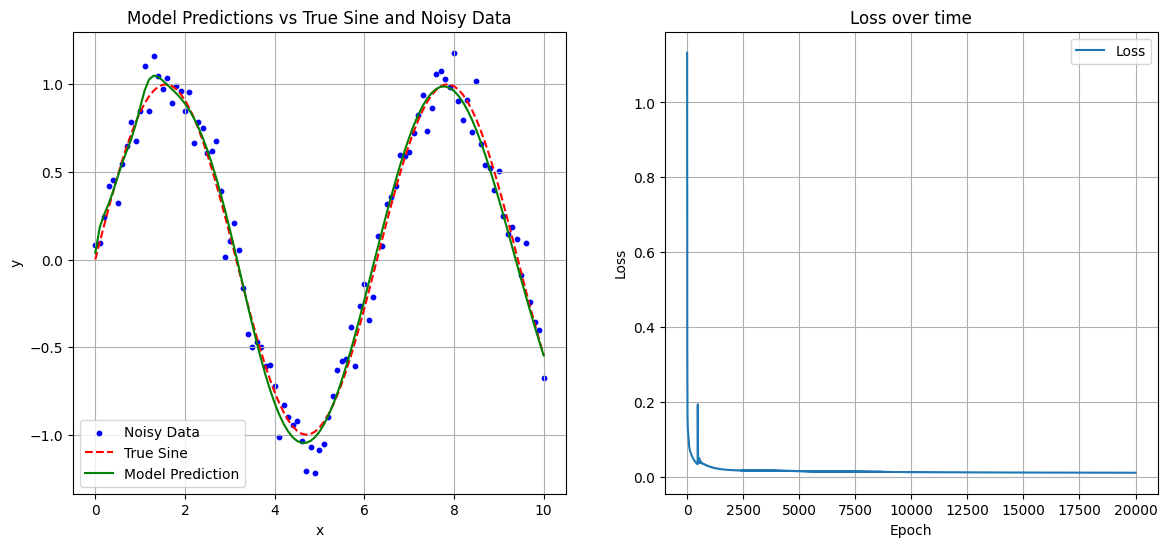

time taken to run: 14.317763083999978


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

t1 = time.perf_counter()

def generate_points(start=0, end=10, step=0.1):
    x_values = np.arange(start, end + step, step)
    num_points = len(x_values)
    y_values = np.sin(x_values)
    noise = np.random.randn(num_points) * 0.1
    noisy_y_values = y_values + noise
    points = list(zip(x_values, noisy_y_values))
    return points

def plot_output(points, model, loss):
    x_values, noisy_y_values = zip(*points)
    x_values = np.array(x_values).reshape(-1, 1)
    noisy_y_values = np.array(noisy_y_values)
    y_values = np.sin(x_values).flatten()

    predicted_y_values = model.predict(x_values).flatten()

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x_values, noisy_y_values, label='Noisy Data', color='blue', s=10)
    plt.plot(x_values, y_values, label='True Sine', color='red', linestyle='--')
    plt.plot(x_values, predicted_y_values, label='Model Prediction', color='green')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Model Predictions vs True Sine and Noisy Data')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Loss')
    plt.title('Loss over time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


class ActivationFunction:
    def forward(self, X):
        raise NotImplementedError

    def backward(self, X, top_diff):
        raise NotImplementedError

class Tanh(ActivationFunction):
    def forward(self, X):
        return np.tanh(X)

    def backward(self, X, top_diff):
        output = self.forward(X)
        return (1.0 - np.square(output)) * top_diff

class ReLU(ActivationFunction):
    def forward(self, X):
        return np.maximum(0, X)

    def backward(self, X, top_diff):
        return (X > 0).astype(float) * top_diff

class Sigmoid(ActivationFunction):
    def forward(self, X):
        return 1 / (1 + np.exp(-X))

    def backward(self, X, top_diff):
        output = self.forward(X)
        return output * (1 - output) * top_diff

class Linear(ActivationFunction):
    def forward(self, X):
        return X

    def backward(self, X, top_diff):
        return top_diff

class Neuron:
    def __init__(self, input_dim, output_dim, activation=None):
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.random.randn(1, output_dim)
        self.activation = activation

    def forward(self, X):
        self.X = X
        self.Z = np.dot(X, self.W) + self.b
        if self.activation:
            self.A = self.activation.forward(self.Z)
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        if self.activation:
            dZ = self.activation.backward(self.Z, dA)
        else:
            dZ = dA
        dW = np.dot(self.X.T, dZ)
        db = np.sum(dZ, axis=0, keepdims=True)
        dX = np.dot(dZ, self.W.T)
        return dW, db, dX

class Model:
    def __init__(self, layers_dim, activations):
        self.layers = []
        input_dim = 1
        for output_dim, activation in zip(layers_dim[:-1], activations[:-1]):
            self.layers.append(Neuron(input_dim, output_dim, activation=activation))
            input_dim = output_dim
        self.layers.append(Neuron(input_dim, layers_dim[-1], activation=activations[-1]))  # Last layer activation
        self.loss = []

    def predict(self, X):
        input = X
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def train(self, X, y, num_passes=20000, learning_rate=0.01, print_loss=False):
        for epoch in range(num_passes):
            # Forward propagation
            input = X
            for layer in self.layers:
                input = layer.forward(input)

            # Calculate the loss (Mean Squared Error)
            loss = np.mean((input - y) ** 2)
            self.loss.append(loss)

            # Back propagation
            dA = 2 * (input - y) / y.size
            for layer in reversed(self.layers):
                dW, db, dA = layer.backward(dA)
                layer.W -= learning_rate * dW
                layer.b -= learning_rate * db

            if print_loss and epoch % 1000 == 0:
                print(f"Loss after iteration {epoch}: {loss:.6f}")
        return self.loss


# Generate the dataset
points = generate_points()

# Define and train the model
layers_dim = [16,20, 1]
activations = [Tanh(), Tanh(), Linear()]  # Using Tanh for hidden layers and Linear for the output layer
model = Model(layers_dim, activations)
x = np.array([point[0] for point in points]).reshape(-1, 1)
y = np.array([point[1] for point in points]).reshape(-1, 1)
loss = model.train(x, y, num_passes=20000, learning_rate=0.01, print_loss=True)


# Plot the output
plot_output(points, model, loss)
t2 = time.perf_counter()
print('time taken to run:',t2-t1)


# สรุป

ในตอนนี้ได้อธิบายเรื่องของการจัดการกับข้อมูลที่ไม่เชิงเส้น โครงสร้างการทำงานของ Machine Learning โครงสร้างของ Neural Network โครงสร้างของ Neuron การทำงานของ Activation Function และบทบาทของ Activation Function ไปจนถึงกลไกของ Backpropagation จนสามารถประมาณค่า (Approximation) ของ Function Sine ได้

ในโลกของ AI เขาถือว่า Deep Learning เป็น Universal Approximation คือ สามารถจะประมาณค่าอะไรก็ได้ (ให้ลองเปิด YouTube และค้นหาคำว่า Universal Approximation) ทำให้ AI สามารถจะสร้างภาพ เสียง หรือ สิ่งต่างๆ ที่เห็นทุกวันนี้ได้

ในตอนนี้หากไม่เข้าใจในส่วนของ Program โดยละเอียดก็ไม่เป็นไร แต่ให้เข้าใจทฤษฎีให้มากๆ เพราะจะเป็นพื้นฐานในการเรียนต่อไป

ในตอนต่อไป เราจะใช้ Library ซึ่งจะทำให้การเขียนโปรแกรมง่ายขึ้น

## Exercise

ให้ทดลองปรับ learning rate ปรับจำนวน Nueron จำนวน Layer และ Activation Function เพื่อหาค่าที่ดีที่สุด ได้แก่ จำนวน epoch ที่น้อยที่สุด และ เวลาน้อยที่สุด แต่ให้ความถูกต้องมากที่สุด และ ให้ตอบคำถาม

สิ่งที่เกิดขึ้นเมื่อปรับ
- จำนวน Layer
- จำนวน node
- learning rate
- activation function

และสรุปการเลือกค่าที่เหมาะสม พร้อม capture ข้อมูล ส่งเป็น PDF
